<div style="background-color: #1DA1F2; padding: 20px;"><b><h1> Descifrando el lenguaje emocional en Twitter: Un análisis predictivo basado en aprendizaje automático. </h1></b></div>

**Autor**: Neivys Luz González Gómez

La identificación de emociones es una tarea fundamental en el campo del procesamiento de lenguaje natural, que se enfoca en clasificar textos según su tono emocional. A pesar de que el objetivo es identificar una amplia variedad de emociones humanas, la mayoría de los conjuntos de datos disponibles se limitan a las polaridades positiva, negativa y, en ocasiones, neutral.

Detectar emociones a partir de textos es un reto complejo en el procesamiento del lenguaje natural, ya que se trata de un problema de clasificación multiclase y, en muchas ocasiones, no hay suficientes datos etiquetados disponibles. Sin embargo, este conjunto de datos etiquetado proporciona la oportunidad de aplicar diversas técnicas de análisis exploratorio y modelado para entender mejor la dinámica emocional en las redes sociales y mejorar la capacidad de detección en tiempo real.

El conjunto de datos de emociones se obtiene a partir de mensajes en inglés de Twitter y contiene seis emociones básicas: neutralidad, preocupación, felicidad, tristeza, amor, sorpresa, diversión, alivio, odio, vacío, entusiasmo y aburrimiento. Este conjunto de datos ofrece una variedad más amplia de emociones humanas, lo que permite el entrenamiento y la evaluación de modelos de análisis de sentimientos con mayor precisión y exhaustividad.

<div class="alert alert-info alert-info"><b><h3>Objetivo General</h3></b>
    
**Desarrollar un modelo que permita detectar emociones en los tweets y analizar patrones en el lenguaje utilizado en Twitter para ayudar en la detección temprana de trastornos emocionales como la depresión, la ansiedad, entre otros.**
</div>

---

# Notebook N° 4: Modelo ML Clasificación - Emociones catalogadas 

<div class="alert alert-block alert-warning">
<b><h1>Descripción de las Variables</h1></b> 
</div>

Se dispone de un conjunto de datos proveniente de data.world, una plataforma que proporciona acceso a conjuntos de datos públicos. Este dataset consiste en una colección de tweets etiquetados con la emoción que expresan. Contiene cuatro columnas que incluyen el identificador del tweet, el sentimiento expresado, el autor y el contenido del tweet. En total, se tienen 40,000 registros con anotaciones para 13 emociones distintas. 

<img src="Notebook.jpg">

---

In [1]:
#import libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string

#import NLTK
import nltk
nltk.download('punkt') #Punkt es una biblioteca que se utiliza para tokenizar frases en lenguaje natural
nltk.download('stopwords') # library "stopwords"
nltk.download('wordnet') # 
nltk.download('omw-1.4') #
nltk.download('averaged_perceptron_tagger')

from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

#import librerias de pre-procesamiento y normalizacion
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.corpus import wordnet
from nltk.tag import pos_tag

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
#Librerias de sklearn
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import FunctionTransformer, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Binarizer
import sklearn.preprocessing as preprocessing
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, Perceptron, PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
import imblearn
from imblearn.over_sampling import SMOTE

---

<div class="alert alert-block alert-info">
<b><h2> Cargar Dataset.</h2></b> 
</div>

In [3]:
df = pd.read_pickle('C:/Users/Lenovo/Documents/Barcelona/IT/Data/Proyecto/dataset1.pickle')

In [4]:
df

,content,sentiment_label
0,layin bed headache ughhhhwaitin call,9
1,funeral ceremonygloomy friday,9
2,want hang friend soon,2
3,want trade someone houston ticket one,7
4,repinging didnt go prom bc bf didnt like friend,11
...,...,...
38983,succesfully following tayla,4
38984,happy mother day love,6
38985,happy mother day mommy woman man long youre mo...,6
38986,wassup beautiful follow peep new hit single ww...,4


## 1. Preparación del Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38988 entries, 0 to 38987
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   content          38988 non-null  object
 1   sentiment_label  38988 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 457.0+ KB


### 1.1 Verificar nulos y NaM

In [6]:
df.isnull().sum()

content            0
sentiment_label    0
dtype: int64

In [7]:
df.isna().sum()

content            0
sentiment_label    0
dtype: int64

<h3>Observaciones:</h3>

   *  Se puede observar que el data set no tiene valores nulos o NaN. 
   *  Se puede observar que el data set no tiene valores duplicados.  
   *  Las variables de importancia para el estudio son del tipo objeto. 
   *  El dataset posee 40000 filas y 4 columnas.

## 2. Modelo

### 2.1 Se define el target y la feature

In [8]:
# Se define el target y la feature
X = df['content']
y = df['sentiment_label']

In [9]:
y.value_counts()

7     8503
11    8439
4     5204
9     5157
6     3837
10    2180
3     1775
8     1524
5     1321
2      759
1      179
0      110
Name: sentiment_label, dtype: int64

In [10]:
X.head()

0               layin bed headache ughhhhwaitin call
1                      funeral ceremonygloomy friday
2                              want hang friend soon
3              want trade someone houston ticket one
4    repinging didnt go prom bc bf didnt like friend
Name: content, dtype: object

In [11]:
# Separamos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [12]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (27291,)
X_test shape: (11697,)
y_train shape: (27291,)
y_test shape: (11697,)


### 2.2 Vectorización

En la actualidad, contamos con cada texto registrado en formato de cadena, lo cual no es útil para nuestros modelos. Para poder trabajar con ellos, debemos transformar cada registro en un vector. Para mejorar la precisión del modelo de clasificación multitarget, se utilizaran dos técnicas de vectorización de texto: **CountVectorizer** y **TF-IDF**. 

La técnica bag-of-words cuenta la frecuencia de cada palabra en un documento, mientras que TF-IDF pondera las palabras según su importancia en un documento. Al utilizar ambas técnicas, se espera capturar tanto la frecuencia como la importancia de las palabras en el texto, lo que debería mejorar la capacidad del modelo para identificar patrones y realizar predicciones precisas en los datos de prueba."

* **CountVectorizer**

In [13]:
# Tokenizer to remove unwanted elements from our data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

# Fit the CountVectorizer to the training data
cv = CountVectorizer(lowercase=False, stop_words='english', ngram_range=(1,1), tokenizer=token.tokenize)
X_train_vec = cv.fit_transform(X_train)

# Transform the test data using the same CountVectorizer object
X_test_vec = cv.transform(X_test)
X_vec = cv.fit_transform(X)

* **TF-IDF**

In [14]:
from sklearn.feature_extraction.text import TfidfTransformer
# We are using transformer here
tfidf = TfidfTransformer()

tfidf.fit(X_train_vec)
X_train_tfidf = tfidf.transform(X_train_vec)
X_test_tfidf = tfidf.transform(X_test_vec)

### 2.3 Evaluación de modelos.

In [15]:
# Seleccionar los mejores modelos a evaluar
classifiers = [
    SVC(),
    SGDClassifier(),
    MultinomialNB(),
    BernoulliNB(),
    XGBClassifier(),
]

In [16]:
import time
from sklearn.model_selection import cross_validate

score_mean = []
score_std = []
fit_time = []
score_time = []

for classifier in classifiers:
    start_time = time.time()
    scores = cross_validate(classifier, X_vec, y, cv=5, scoring='accuracy', return_train_score=False)
    fit_time.append(scores['fit_time'].mean())
    score_time.append(scores['score_time'].mean())
    score_mean.append(scores['test_score'].mean())
    score_std.append(scores['test_score'].std())
    print(f'{type(classifier).__name__}: {scores["test_score"].mean()}')
    print(f'  fit time: {scores["fit_time"].mean():.5f}s')
    print(f'  score time: {scores["score_time"].mean():.5f}s')

SVC: 0.345798821157663
  fit time: 249.53003s
  score time: 26.83634s
SGDClassifier: 0.31263482712769586
  fit time: 0.88791s
  score time: 0.00000s
MultinomialNB: 0.3138150411524441
  fit time: 0.02367s
  score time: 0.00937s
BernoulliNB: 0.29839972384667457
  fit time: 0.02786s
  score time: 0.01707s
XGBClassifier: 0.3420285019626156
  fit time: 32.04096s
  score time: 0.38441s


In [17]:
tabla = pd.DataFrame({
    'model': ['SVC', 'SGDClassifier', 'MultinomialNB', 'BernoulliNB', 'XGBClassifier'],
    'acc_cv': score_mean,
    'acc_std_cv': score_std,
    'fit_time': fit_time,
    'score_time': score_time
})

In [18]:
tabla

,model,acc_cv,acc_std_cv,fit_time,score_time
0,SVC,0.345799,0.023585,249.530033,26.836338
1,SGDClassifier,0.312635,0.017902,0.887907,0.000000
2,MultinomialNB,0.313815,0.027019,0.023668,0.009372
3,BernoulliNB,0.298400,0.017389,0.027857,0.017074
4,XGBClassifier,0.342029,0.023186,32.040961,0.384412


Los resultados de los cinco modelos de aprendizaje automático evaluados en la tarea de clasificación de emociones de tweets indican que la precisión media de la validación cruzada varía desde el 29.8% hasta el 34.5%, con una desviación estándar que oscila desde el 1.7% hasta el 2.7%. El modelo que presenta la mayor precisión media es el SVC con 0.345799, seguido por el XGBClassifier con 0.342029 y el MultinomialNB con 0.313815. El modelo que presenta la menor precisión media es el BernoulliNB con 0.298400.

El modelo SGDClassifier presenta una precisión media de la validación cruzada de 0.312635, con una desviación estándar de 0.017902, lo que lo coloca en el cuarto lugar en términos de precisión media de los cinco modelos evaluados. Además, su tiempo de entrenamiento es bajo en comparación con los otros modelos evaluados, con un valor de 0.887907.

En general, los resultados sugieren que los modelos de clasificación evaluados no logran una precisión elevada en la tarea de clasificación de emociones de tweets, lo que sugiere que podrían ser necesarios ajustes en los parámetros de los modelos o en la selección de variables utilizadas en el modelo para mejorar el rendimiento. Además, es importante tener en cuenta que otros factores, como el equilibrio de clases y el costo de los errores, también pueden ser importantes para considerar en la selección del modelo adecuado.

En resumen, aunque algunos modelos presentan una precisión media ligeramente más alta que otros, es posible que se requieran ajustes adicionales para mejorar el rendimiento general de los modelos en la clasificación de emociones de tweets. El modelo SGDClassifier podría ser una opción atractiva en situaciones donde se requiere un modelo con un tiempo de entrenamiento rápido, pero si se prioriza la precisión, se podría optar por otro modelo con una precisión media más alta el XGBClassifier.

## 3. Creación y predicción del modelo base

In [24]:
pipe_model = Pipeline([('vector', CountVectorizer()), 
                 ('tfidf', TfidfTransformer()),  
                 ('model', SGDClassifier(random_state=42))])

In [25]:
pipe_model.fit(X_train, y_train)
y_pred = pipe_model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.3146960759169018


<AxesSubplot:>

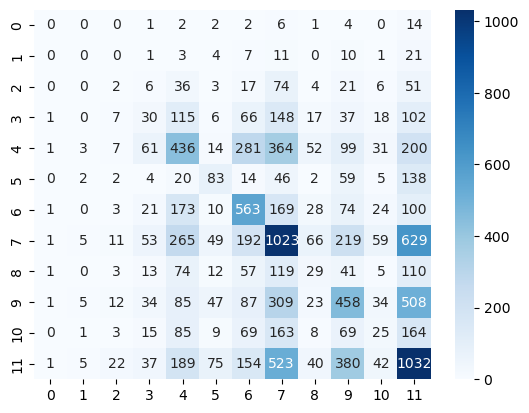

In [26]:
labels = np.unique(y_test)
cm = confusion_matrix(y_test, y_pred, labels=labels)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

In [27]:
# classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.00      0.00      0.00        58
           2       0.03      0.01      0.01       220
           3       0.11      0.05      0.07       547
           4       0.29      0.28      0.29      1549
           5       0.26      0.22      0.24       375
           6       0.37      0.48      0.42      1166
           7       0.35      0.40      0.37      2572
           8       0.11      0.06      0.08       464
           9       0.31      0.29      0.30      1603
          10       0.10      0.04      0.06       611
          11       0.34      0.41      0.37      2500

    accuracy                           0.31     11697
   macro avg       0.19      0.19      0.18     11697
weighted avg       0.29      0.31      0.30     11697



In [28]:
# Calcula el F1-score
f1 = f1_score(y_test, y_pred, average='weighted', labels=[1])
f1

0.0

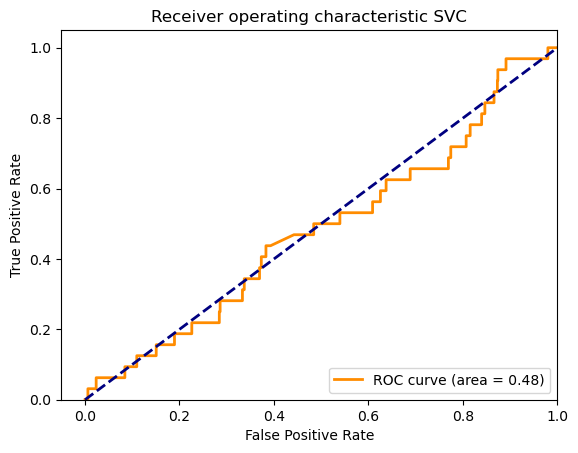

In [29]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Obtener las probabilidades de la predicción
y_score = pipe_model.decision_function(X_test)

# Crear un diccionario con los valores necesarios para graficar la curva AUC-ROC
fpr = {}
tpr = {}
roc_auc = {}
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar la curva AUC-ROC
plt.figure()
plt.plot(fpr[0], tpr[0], color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic SVC')
plt.legend(loc="lower right")
plt.show()

Los resultados del modelo muestran una precisión promedio de 0.31, lo que indica que el modelo es capaz de clasificar correctamente el 31% de las muestras. El recall promedio es bajo, con valores inferiores al 50% para todas las clases, lo que indica que el modelo no es capaz de identificar correctamente la mayoría de las muestras de cada clase.

El valor F1-score, que es una medida ponderada de precisión y recall, también es bajo para cada clase, con valores que oscilan entre 0.01 y 0.42. La macro media del valor F1-score es de 0.18, lo que indica que el modelo no es capaz de clasificar correctamente la mayoría de las muestras.

La curva ROC del modelo tiene un valor de 0.48, lo que sugiere que el modelo tiene una capacidad limitada para distinguir entre las diferentes clases. En general, estos resultados sugieren que el modelo no es muy efectivo para clasificar las emociones de los textos de los tweets, y se necesita mejorar el modelo o recopilar más datos para mejorar la precisión y recall.

## 4.  Hiperparametos (Mejores parametros)

In [30]:
pipeline = Pipeline(
    [
        ('vector', CountVectorizer(lowercase=False)), 
        ('tfidf', TfidfTransformer()),  
        ('model', SGDClassifier(random_state=42))
    ]
)

parameters = {
    'model__alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],
    'model__penalty': ['l2', 'l1', 'elasticnet'],
    'model__max_iter': [1000, 2000, 5000],
    'model__class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(pipeline, parameters, cv=3, n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

print('score', grid_search.score(X_test, y_test))
print('-----')

print('GridSearchCV:')
y_pred_p = grid_search.predict(X_test)

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

# Print Confusion Matrix
labels = np.unique(y_test)
cm =  confusion_matrix(y_test, y_pred, labels=labels)
pd.DataFrame(cm, index=labels, columns=labels)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
score 0.3134136958194409
-----
GridSearchCV:
Best score: 0.317
Best parameters set:
	model__alpha: 0.001
	model__class_weight: None
	model__max_iter: 1000
	model__penalty: 'l2'


,0,1,2,3,4,5,6,7,8,9,10,11
0,0,0,0,1,2,2,2,6,1,4,0,14
1,0,0,0,1,3,4,7,11,0,10,1,21
2,0,0,2,6,36,3,17,74,4,21,6,51
3,1,0,7,30,115,6,66,148,17,37,18,102
4,1,3,7,61,436,14,281,364,52,99,31,200
5,0,2,2,4,20,83,14,46,2,59,5,138
6,1,0,3,21,173,10,563,169,28,74,24,100
7,1,5,11,53,265,49,192,1023,66,219,59,629
8,1,0,3,13,74,12,57,119,29,41,5,110
9,1,5,12,34,85,47,87,309,23,458,34,508


In [31]:
# model with best parameters

pipeline_bp = Pipeline(
    [
        ('vector', CountVectorizer(lowercase=False)), 
        ('tfidf', TfidfTransformer()),  
        ('model', SGDClassifier(random_state=42, alpha= 0.0001, class_weight=None, max_iter=1000, 
                                penalty='l2'))
    ]
)

pipeline.fit(X_train, y_train)
print('Accuracy score: {0:.5f}'.format(pipeline.score(X_test, y_test)))

y_pred_bp = pipeline.predict(X_test)

Accuracy score: 0.31470


<AxesSubplot:>

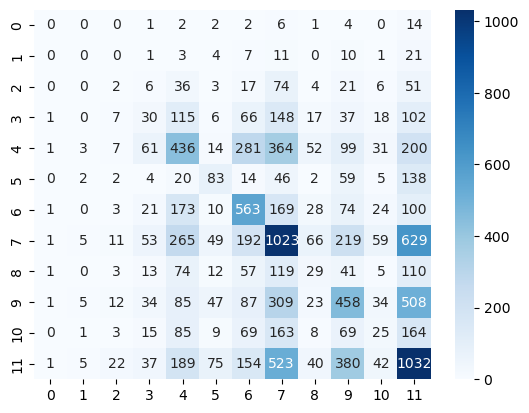

In [32]:
labels = np.unique(y_test)
cm = confusion_matrix(y_test, y_pred_bp, labels=labels)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

In [33]:
# classification_report
print(classification_report(y_test, y_pred_bp))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.00      0.00      0.00        58
           2       0.03      0.01      0.01       220
           3       0.11      0.05      0.07       547
           4       0.29      0.28      0.29      1549
           5       0.26      0.22      0.24       375
           6       0.37      0.48      0.42      1166
           7       0.35      0.40      0.37      2572
           8       0.11      0.06      0.08       464
           9       0.31      0.29      0.30      1603
          10       0.10      0.04      0.06       611
          11       0.34      0.41      0.37      2500

    accuracy                           0.31     11697
   macro avg       0.19      0.19      0.18     11697
weighted avg       0.29      0.31      0.30     11697



In [34]:
# model with best parameters with CV

# Crear el pipeline con los pasos de preprocesamiento y el modelo
pipeline_cv = Pipeline([
    ('vector', CountVectorizer(lowercase=False)), 
    ('tfidf', TfidfTransformer()),  
    ('model', SGDClassifier(random_state=42, alpha= 0.0001, class_weight=None, max_iter=1000, 
                                penalty='l2'))
])

# Calcular la puntuación de precisión usando cross-validation con 5 folds
score = cross_val_score(pipeline_cv, X, y, cv=5, scoring='accuracy')

# Imprimir la puntuación media de precisión
print('Accuracy score: {0:.2f}'.format(score.mean()))

Accuracy score: 0.31


## 5.  Balanceo de la data (Smote SKleaern)

In [35]:
from imblearn.pipeline import Pipeline as ImbPipeline

pipeline_sm = ImbPipeline(
    [
        ('vector', CountVectorizer(lowercase=False)), 
        ('tfidf', TfidfTransformer()),
        ('smote', ImbPipeline([
            ('smote', SMOTE(random_state=42)),
            ('model', SGDClassifier(random_state=42, alpha= 0.0001, class_weight=None, max_iter=1000, 
                                penalty='l2'))
        ]))
    ]
)

score = cross_val_score(pipeline_sm, X, y, cv=5, scoring='accuracy')
print('Accuracy score: {0:.4f}'.format(score.mean()))

Accuracy score: 0.1879


In [36]:
pipeline_sm.fit(X_train, y_train)
print('Accuracy score: {0:.4f}'.format(pipeline_sm.score(X_test, y_test)))

y_pred_sm = pipeline_sm.predict(X_test)

Accuracy score: 0.1915


## 6. Observaciones generales

* Los modelos de clasificación SVC, SGDClassifier, MultinomialNB, BernoulliNB y XGBClassifier fueron evaluados y el modelo que demostró un mejor rendimiento fue el SGDClassifier, con un accuracy score de 0.3146960759169018. Sin embargo, se debe tener en cuenta que la precisión, recall y f1-score por clase fueron bajos, con un valor máximo de 0.42 para la clase 6.


*  La curva ROC del modelo SGDClassifier fue de 0.48, lo que indica que el modelo tiene una capacidad limitada para distinguir entre las diferentes clases.


* Se realizaron pruebas de hiperparámetros y se encontraron los mejores parámetros para el modelo SGDClassifier, los cuales incluyen un alpha de 0.001, sin peso de clase, un máximo de iteraciones de 1000 y una penalización de l2.


* El conjunto de datos muestra una clara desigualdad de distribución de clases, lo que se refleja en el bajo rendimiento del modelo en general. Se debe considerar el uso de técnicas de balanceo de datos como SMOTE para mejorar el rendimiento del modelo.


* El accuracy score de la muestra balanceada usando SMOTE fue de 0.1915, lo que indica que el balanceo de datos disminuyó el rendimiento del modelo. 


* En general, se concluye que el modelo SGDClassifier muestra un rendimiento insuficiente para clasificar las emociones en los tweets debido a la desigualdad de la distribución de clases. Se sugiere el uso de técnicas de balanceo de datos manualmente y el ajuste de hiperparámetros para mejorar el rendimiento del modelo. También se recomienda explorar otros modelos de clasificación y técnicas de preprocesamiento de texto para mejorar la precisión en la clasificación de emociones en los tweets.